## Introduction 

###### What kind of movie do you like and how does streaming services choose which series or movies to recommend to each of their users? Recommendation Systems are a type of information filtering systems that help improve quality of search by suggesting relevant items to users based on applied criterias. I will use Python and Pandas to guide you throguh how an Recommendation System helps users identify their next movie.

## Data Preprocessing 

In [22]:
import numpy as np
import pandas as pd 

In [2]:
movie= pd.read_csv('movies_metadata.csv')
movie.head(5)

C:\Users\iwang\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
movie.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [4]:
rating=pd.read_csv('ratings.csv')
rating.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [5]:
movie_title=movie["original_title"]
movie_title

0                          Toy Story
1                            Jumanji
2                   Grumpier Old Men
3                  Waiting to Exhale
4        Father of the Bride Part II
                    ...             
45461                        رگ خواب
45462            Siglo ng Pagluluwal
45463                       Betrayal
45464            Satana likuyushchiy
45465                       Queerama
Name: original_title, Length: 45466, dtype: object

In [6]:
df=pd.concat([rating,movie_title],axis=1)
df

,userId,movieId,rating,timestamp,original_title
0,1,110,1.0,1425941529,Toy Story
1,1,147,4.5,1425942435,Jumanji
2,1,858,5.0,1425941523,Grumpier Old Men
3,1,1221,5.0,1425941546,Waiting to Exhale
4,1,1246,5.0,1425941556,Father of the Bride Part II
...,...,...,...,...,...
26024284,270896,58559,5.0,1257031564,NaN
26024285,270896,60069,5.0,1257032032,NaN
26024286,270896,63082,4.5,1257031764,NaN
26024287,270896,64957,4.5,1257033990,NaN


In [7]:
df.groupby('original_title')['rating'].mean().sort_values(ascending=False).head()
ratings=pd.DataFrame(df.groupby('original_title')['rating'].mean())
ratings

,rating
original_title,
!Women Art Revolution,2.5
#1 Cheerleader Camp,4.5
#Horror,5.0
#Pellichoopulu,3.0
#SELFIEPARTY,4.0
...,...
１リットルの涙,4.5
１３号待避線より その護送車を狙え,3.5
２０世紀少年< 第1章> 終わりの始まり,5.0


In [8]:
df.groupby('original_title')['rating'].count().sort_values(ascending=False).head()
ratings['Num_of_rating']=pd.DataFrame(df.groupby('original_title')['rating'].count())
ratings

,rating,Num_of_rating
original_title,,
!Women Art Revolution,2.5,1
#1 Cheerleader Camp,4.5,1
#Horror,5.0,1
#Pellichoopulu,3.0,1
#SELFIEPARTY,4.0,1
...,...,...
１リットルの涙,4.5,1
１３号待避線より その護送車を狙え,3.5,1
２０世紀少年< 第1章> 終わりの始まり,5.0,1


## Exploratory Data Analysis 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
%matplotlib inline

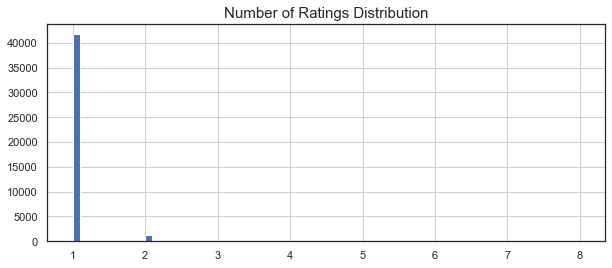

In [27]:
plt.figure(figsize=(10,4))
ratings['Num_of_rating'].hist(bins=70)
plt.title('Number of Ratings Distribution' , fontsize=15)
plt.show()

###### Most of the movies have only 1 rating while small number of movies has more than 1 rating. The greater the number of rating, the more trustworthy the ratings are. 

In [11]:
ratings.sort_values('Num_of_rating', ascending=False).head(10)

,rating,Num_of_rating
original_title,,
Alice in Wonderland,2.687500,8
Hamlet,3.312500,8
A Christmas Carol,3.642857,7
The Three Musketeers,3.285714,7
Macbeth,3.500000,7
Les Misérables,3.071429,7
Cinderella,3.857143,7
Treasure Island,3.250000,6
King Lear,3.166667,6


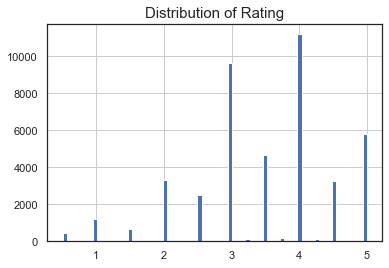

In [26]:
plt.figure(figsize=None)
ratings['rating'].hist(bins=70)
plt.title('Distribution of Rating' , fontsize=15)
plt.show()

###### Rating varaible follows a bell curve shaped distrbution as most movies have rating of 4 (average)

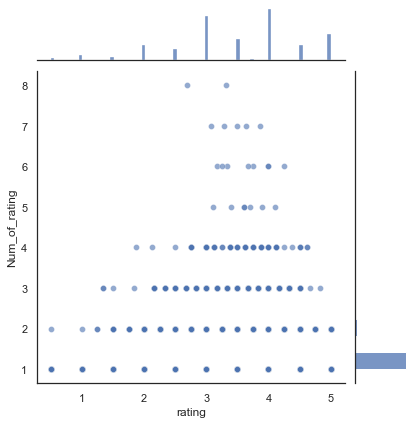

In [13]:
sns.jointplot(x='rating', y='Num_of_rating', data=ratings, alpha=0.6)

In [23]:
moviemat=df.pivot_table(index='userId', columns='original_title', values='rating')
moviemat.head(2)

original_title,!Women Art Revolution,#1 Cheerleader Camp,#Horror,#Pellichoopulu,#SELFIEPARTY,#chicagoGirl,$ Dollars,$5 a Day,$50K and a Call Girl: A Love Story,$9.99,...,후궁: 제왕의 첩,후회하지 않아,龍在江湖,琉璃樽,０課の女 赤い手錠,１リットルの涙,１３号待避線より その護送車を狙え,２０世紀少年< 第1章> 終わりの始まり,３－４Ｘ１０月,ＳＭガールズ セイバーマリオネットＲ
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ratings.sort_values('Num_of_rating', ascending=False).head(10)

,rating,Num_of_rating
original_title,,
Alice in Wonderland,2.687500,8
Hamlet,3.312500,8
A Christmas Carol,3.642857,7
The Three Musketeers,3.285714,7
Macbeth,3.500000,7
Les Misérables,3.071429,7
Cinderella,3.857143,7
Treasure Island,3.250000,6
King Lear,3.166667,6


###### Alice in Wonderland & Hamlet have the greatest number of ratings (8) so we pick Hamlet as our first movie for recommendation

In [16]:
Hamlet_user_rating=moviemat['Hamlet']
Hamlet_user_rating

userId
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
       ..
473   NaN
474   NaN
475   NaN
476   NaN
477   NaN
Name: Hamlet, Length: 477, dtype: float64

In [18]:
similar_to_Hamlet=moviemat.corrwith(Hamlet_user_rating)
corr_Hamlet=pd.DataFrame(similar_to_Hamlet,columns=['Correlation'])
corr_Hamlet.dropna(inplace=True)
corr_Hamlet.head()

,Correlation
original_title,
Backstage,-1.0
Conan the Barbarian,-1.0
Footloose,1.0
Hamlet,1.0
Les Misérables,1.0


In [19]:
corr_Hamlet.sort_values('Correlation',ascending=False).head()

,Correlation
original_title,
Footloose,1.0
The Uninvited,1.0
Hamlet,1.0
Les Misérables,1.0
Sleeping Beauty,1.0


In [20]:
corr_Hamlet=corr_Hamlet.join(ratings['Num_of_rating'])
corr_Hamlet.head()

,Correlation,Num_of_rating
original_title,,
Backstage,-1.0,2
Conan the Barbarian,-1.0,2
Footloose,1.0,2
Hamlet,1.0,8
Les Misérables,1.0,7


###### So the next movie the user get suggested after Hamlet is Les Misérables becasue it is most similar to Hamlet with 7 ratings

In [21]:
corr_Hamlet[corr_Hamlet['Num_of_rating']>2].sort_values('Correlation',ascending=False).head()

,Correlation,Num_of_rating
original_title,,
The Uninvited,1.0,3
Hamlet,1.0,8
Les Misérables,1.0,7
Sleeping Beauty,1.0,4
The Three Musketeers,-1.0,7


### Scopes and Limitation

###### This is just the very basic of Recommendation System, which is part of unpersonalized recommendation systems. We can achieve personalized recommendation systems by feeding machine learning algorithm with large amounts of data to make unique predictions for each individual user. Most recommendation systems used today will utilize some form of collaborative filtering which requires a large collection of user ratings for an assortment of items.